In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

In [ ]:
df=pd.read_csv('/content/heart.csv')

In [ ]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [ ]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [ ]:
df.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


<Axes: >

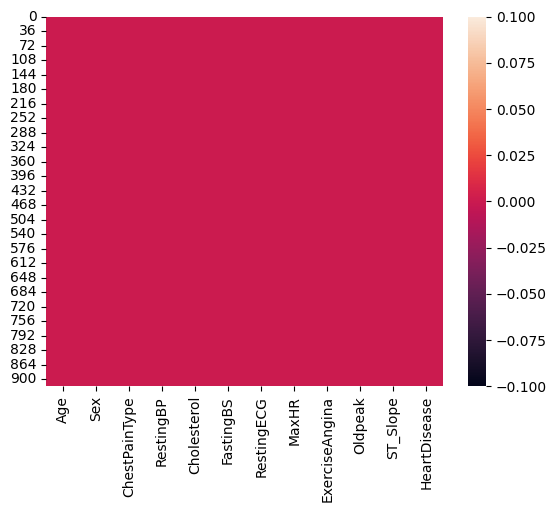

In [ ]:
sns.heatmap(df.isnull())

In [ ]:
df['Sex'].value_counts()

,count
Sex,
M,725
F,193


In [ ]:
df['ChestPainType'].value_counts()

,count
ChestPainType,
ASY,496
NAP,203
ATA,173
TA,46


In [ ]:
df['RestingECG'].value_counts()

,count
RestingECG,
Normal,552
LVH,188
ST,178


In [ ]:
df['ExerciseAngina'].value_counts()

,count
ExerciseAngina,
N,547
Y,371


In [ ]:
df['ST_Slope'].value_counts()

,count
ST_Slope,
Flat,460
Up,395
Down,63


In [ ]:
df['HeartDisease'].value_counts()

,count
HeartDisease,
1,508
0,410


In [ ]:
df['Sex'] = df['Sex'].map({'M': 1, 'F': 0})  # 1 for Male, 0 for Female
df['ChestPainType'] = df['ChestPainType'].map({'ASY': 0, 'NAP': 1, 'ATA': 2, 'TA': 3})
mapping = {
    'Normal': 0,
    'LVH': 1,
    'ST': 2
}
df['RestingECG'] = df['RestingECG'].map(mapping)
exercise_mapping = {
    'N': 0,  # No
    'Y': 1   # Yes
}
df['ExerciseAngina'] = df['ExerciseAngina'].map(exercise_mapping)
df['Oldpeak'] = df['Oldpeak'].astype(int)

st_slope_mapping = {
    'Flat': 0,  # Flat slope
    'Up': 1,    # Up slope
    'Down': 2    # Down slope
}

# Apply the mapping to the 'ST_Slope' column
df['ST_Slope'] = df['ST_Slope'].map(st_slope_mapping)

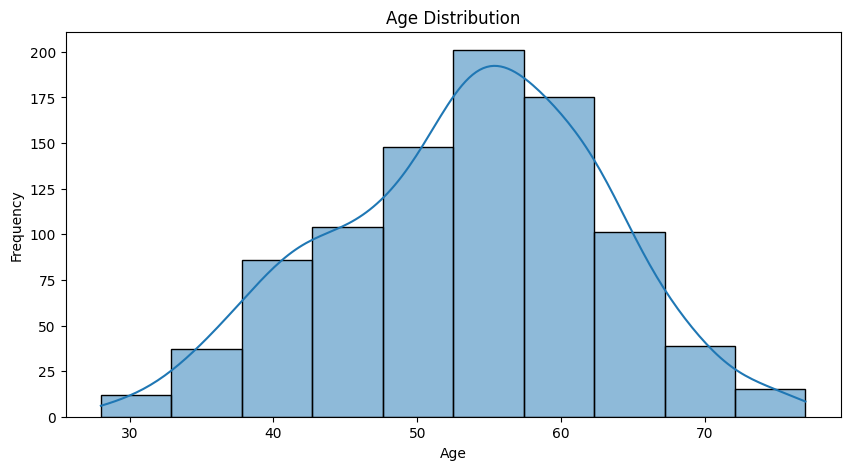

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Age'], bins=10, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [ ]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,2,140,289,0,0,172,0,0,1,0
1,49,0,1,160,180,0,0,156,0,1,0,1
2,37,1,2,130,283,0,2,98,0,0,1,0
3,48,0,0,138,214,0,0,108,1,1,0,1
4,54,1,1,150,195,0,0,122,0,0,1,0


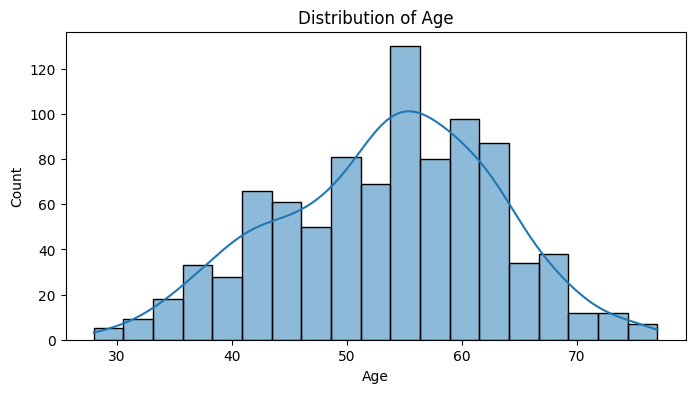

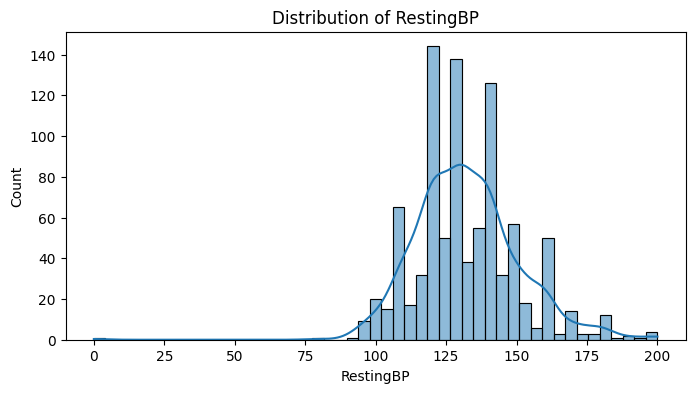

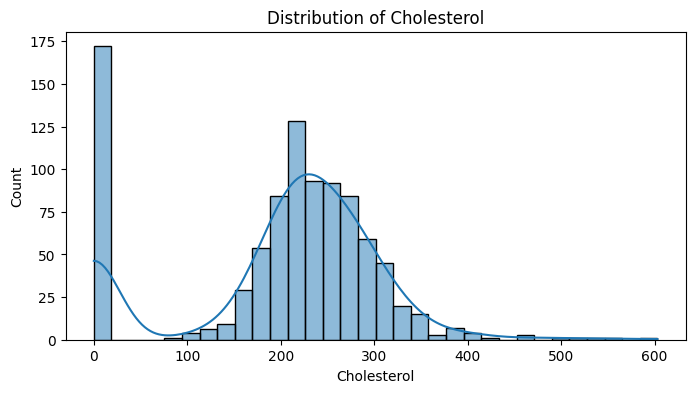

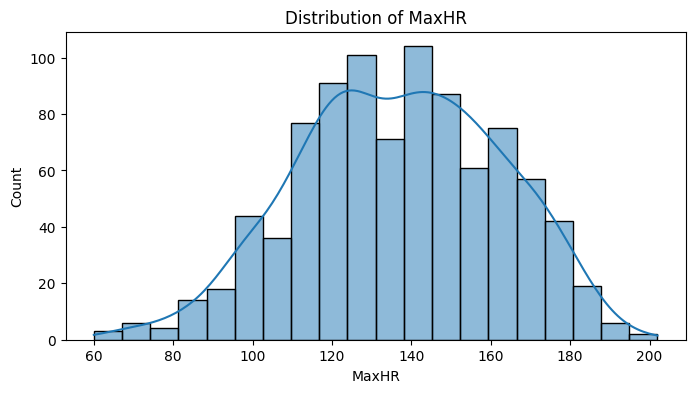

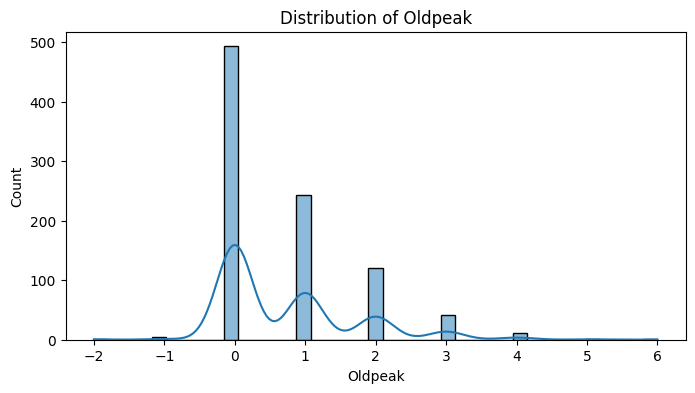

In [ ]:
continuous_vars = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
for var in continuous_vars:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[var], kde=True)
    plt.title(f'Distribution of {var}')
    plt.show()

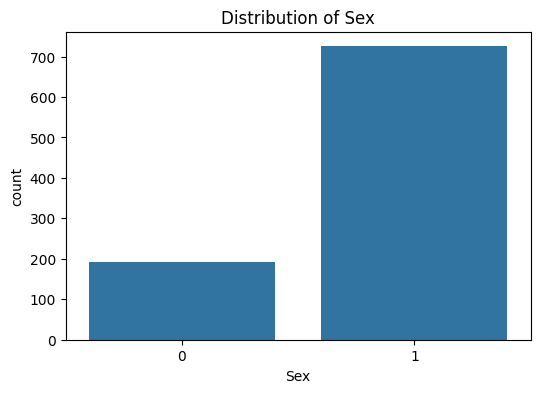

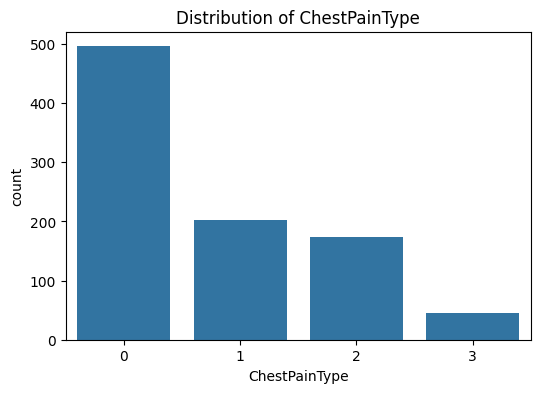

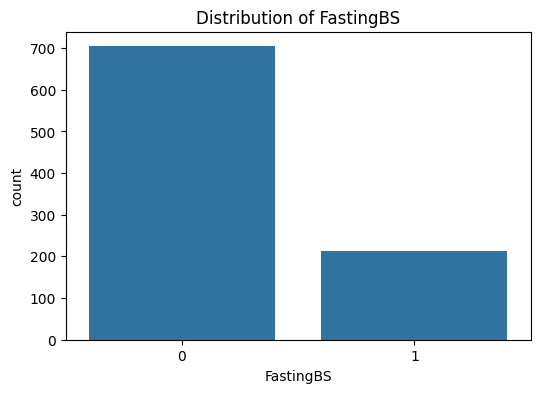

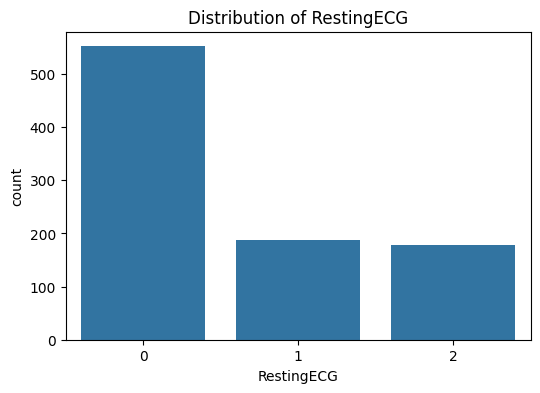

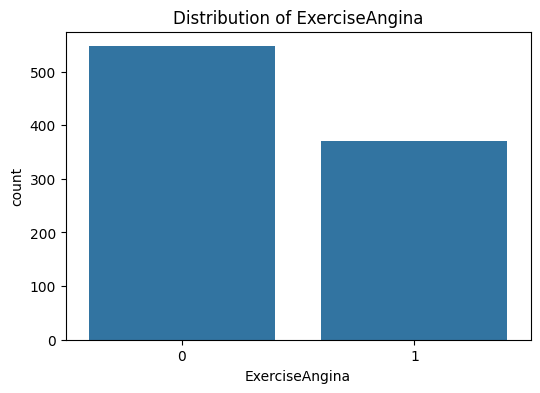

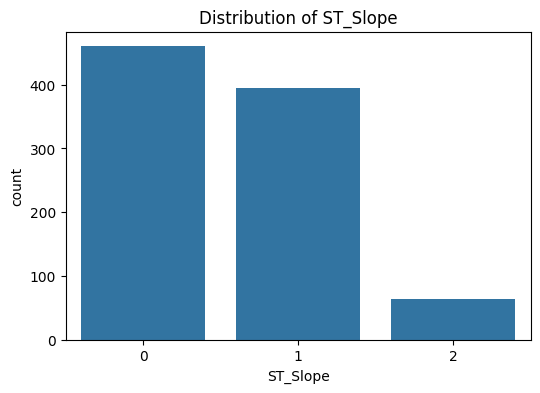

In [ ]:
categorical_vars = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
for var in categorical_vars:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=df[var])
    plt.title(f'Distribution of {var}')
    plt.show()

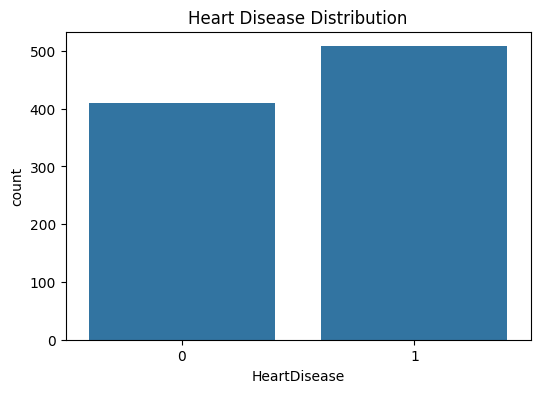

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df['HeartDisease'])
plt.title('Heart Disease Distribution')
plt.show()

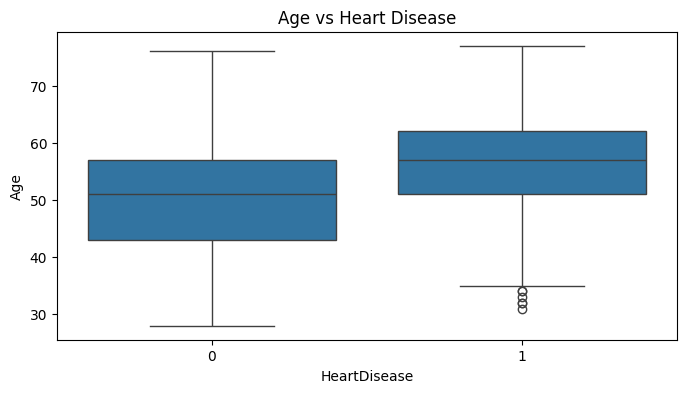

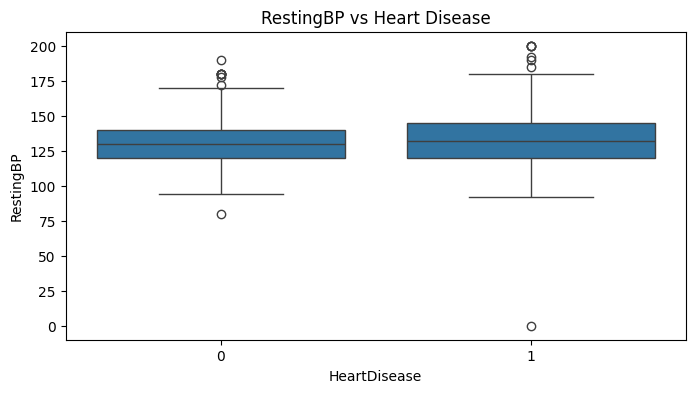

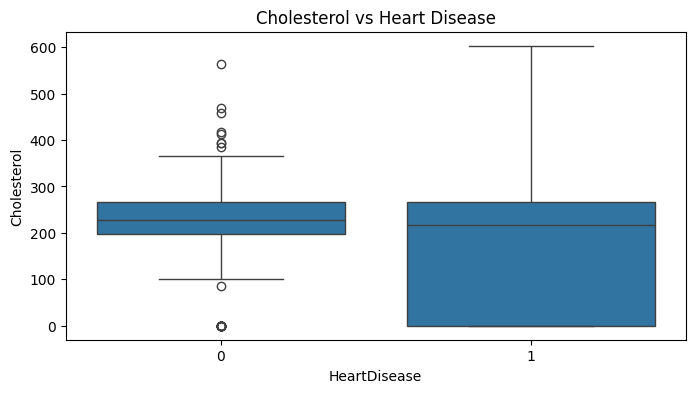

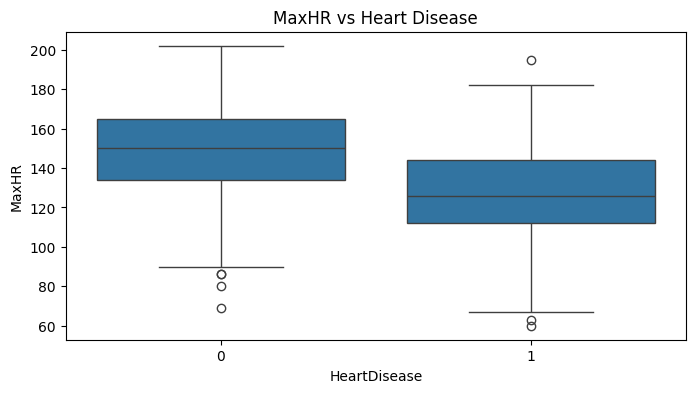

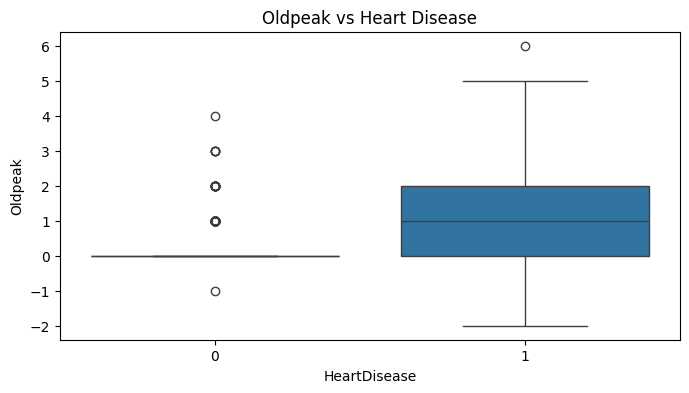

In [ ]:
for var in continuous_vars:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df['HeartDisease'], y=df[var])
    plt.title(f'{var} vs Heart Disease')
    plt.show()

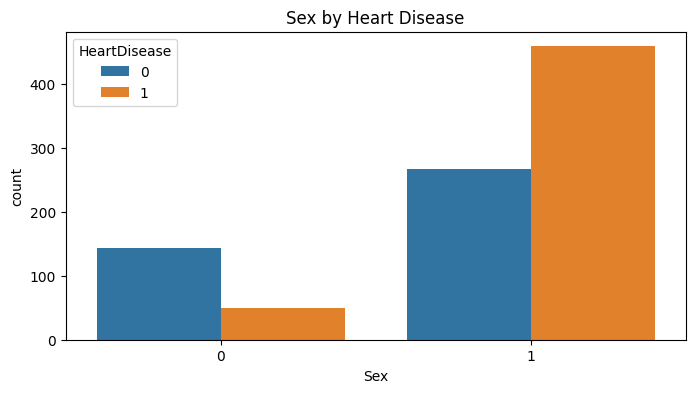

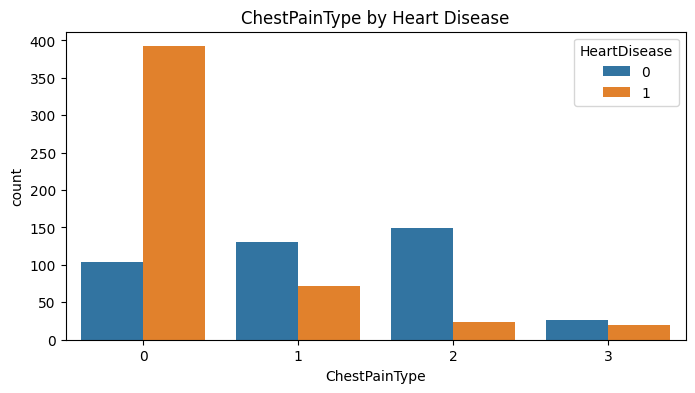

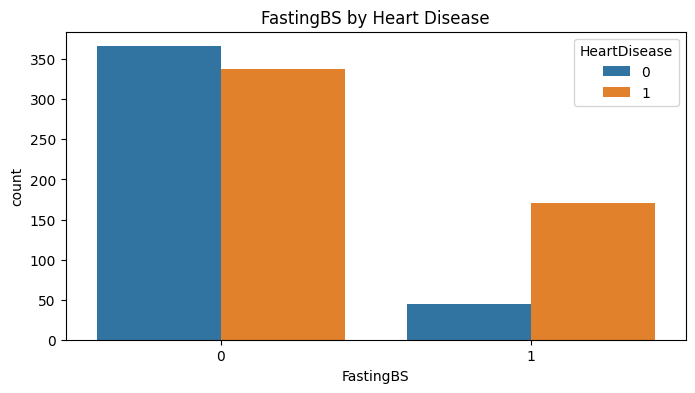

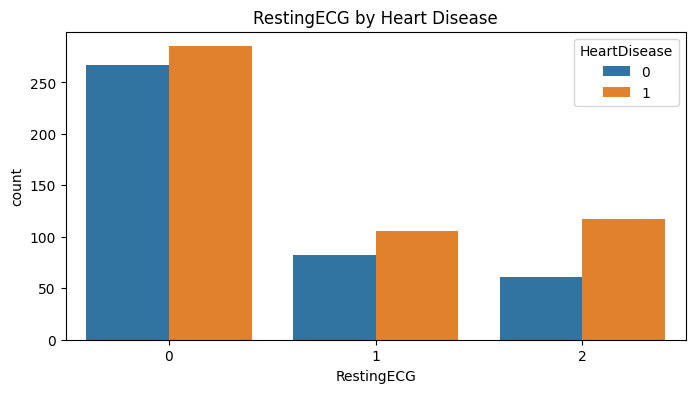

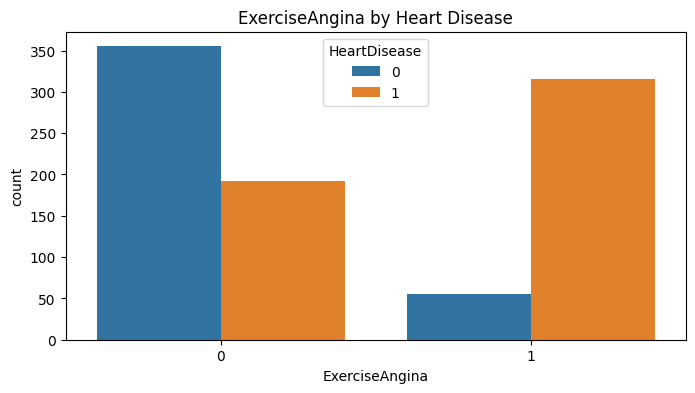

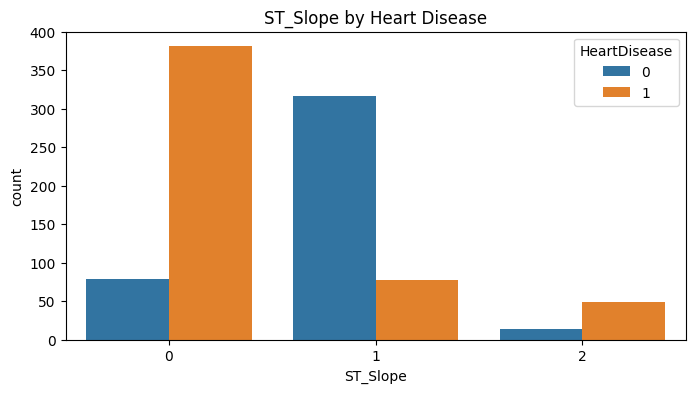

In [ ]:
for var in categorical_vars:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=df[var], hue=df['HeartDisease'])
    plt.title(f'{var} by Heart Disease')
    plt.show()

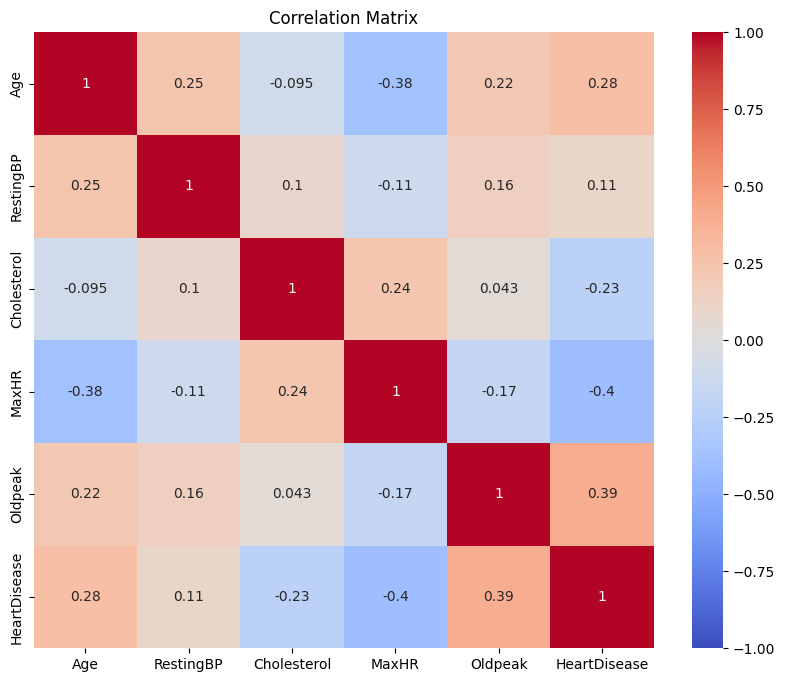

In [ ]:
plt.figure(figsize=(10, 8))
correlation = df[continuous_vars + ['HeartDisease']].corr()
sns.heatmap(correlation, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

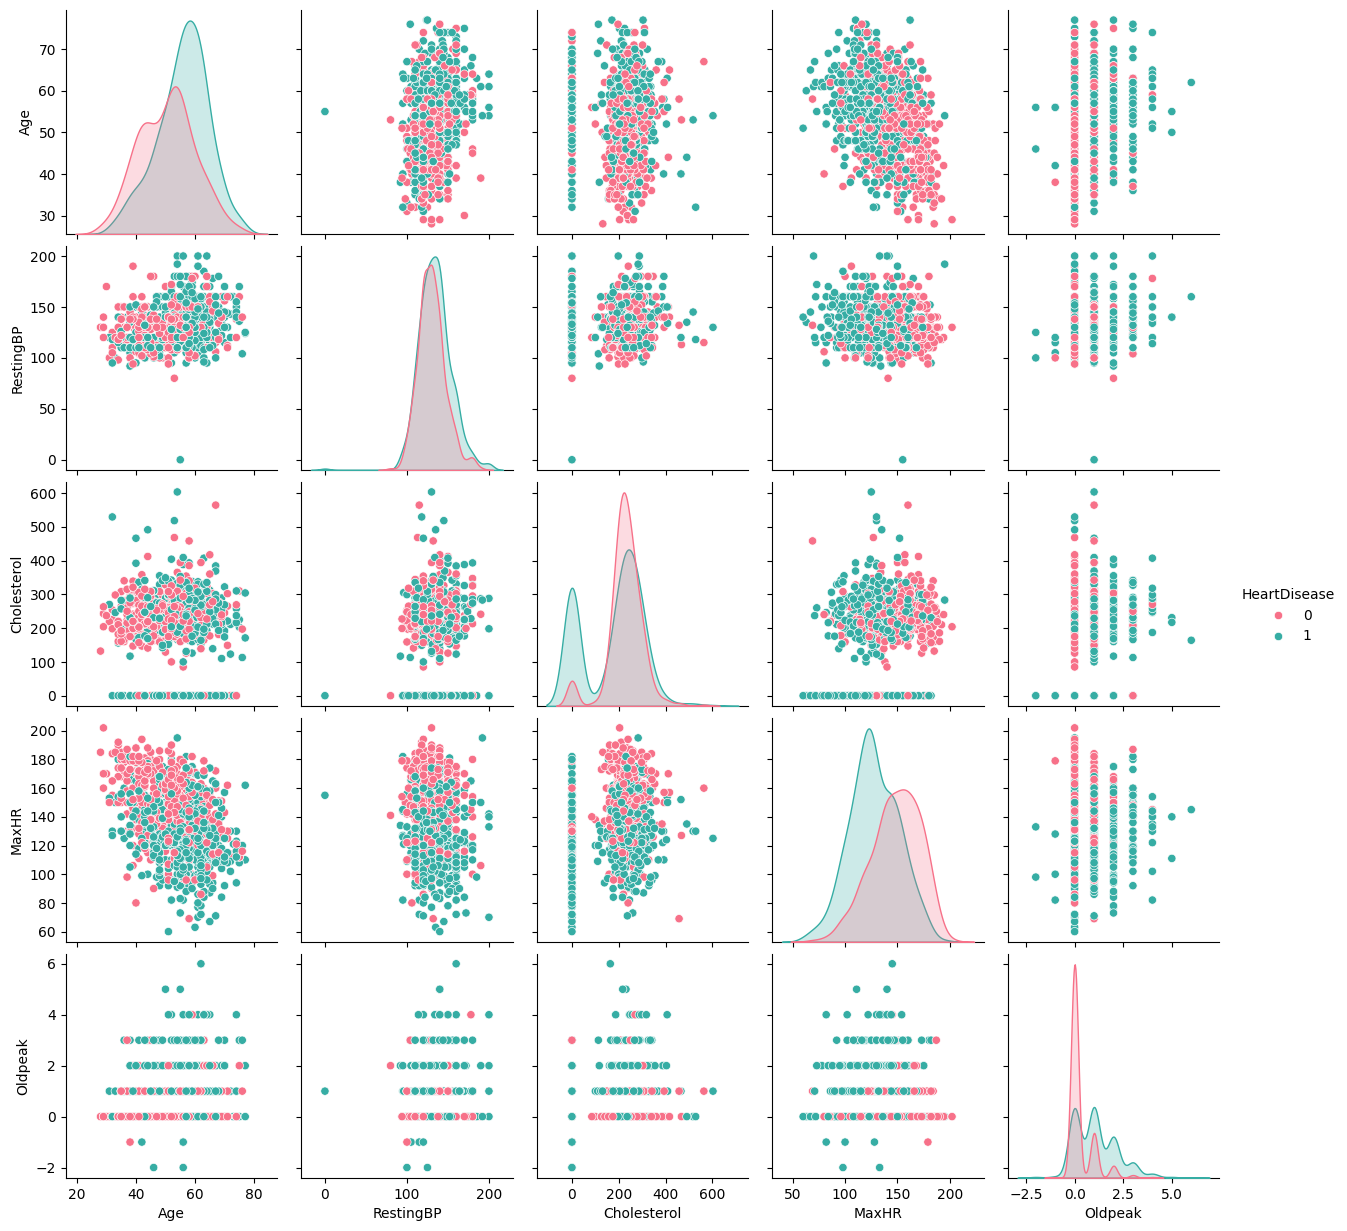

In [ ]:
sns.pairplot(df[continuous_vars + ['HeartDisease']], hue="HeartDisease", diag_kind="kde", palette="husl")
plt.show()

In [ ]:
#Define features (X) and target variable (y)
X = df.drop('HeartDisease', axis=1)  # Features
y = df['HeartDisease']  # Target variable

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.45, random_state=42)

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'XGBoost': xgb.XGBClassifier()
}

In [ ]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,2,140,289,0,0,172,0,0,1,0
1,49,0,1,160,180,0,0,156,0,1,0,1
2,37,1,2,130,283,0,2,98,0,0,1,0
3,48,0,0,138,214,0,0,108,1,1,0,1
4,54,1,1,150,195,0,0,122,0,0,1,0


--- Logistic Regression ---
Accuracy: 0.8454
Precision: 0.8552
Recall: 0.8454
Confusion Matrix:
[[155  18]
 [ 46 195]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


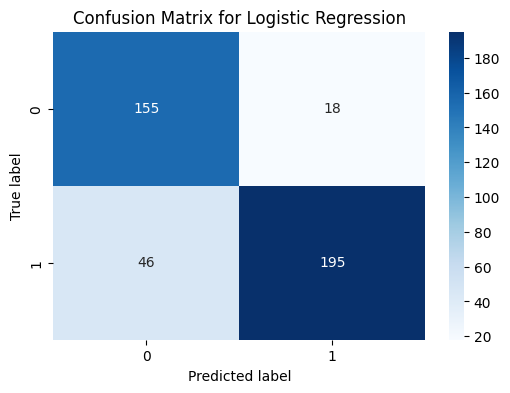



--- Random Forest ---
Accuracy: 0.8841
Precision: 0.8865
Recall: 0.8841
Confusion Matrix:
[[155  18]
 [ 30 211]]


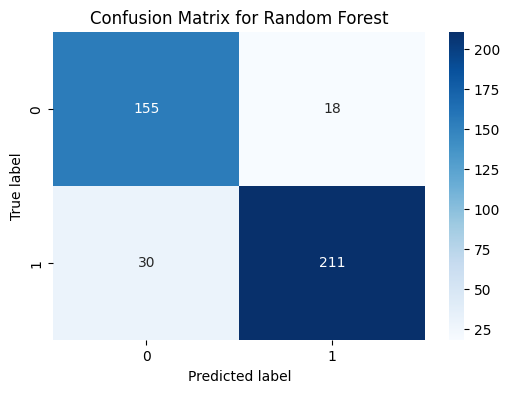



--- SVM ---
Accuracy: 0.7246
Precision: 0.7303
Recall: 0.7246
Confusion Matrix:
[[125  48]
 [ 66 175]]


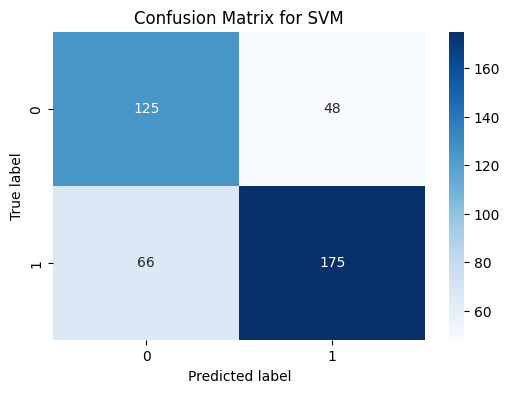



--- K-Nearest Neighbors ---
Accuracy: 0.6981
Precision: 0.6978
Recall: 0.6981
Confusion Matrix:
[[110  63]
 [ 62 179]]


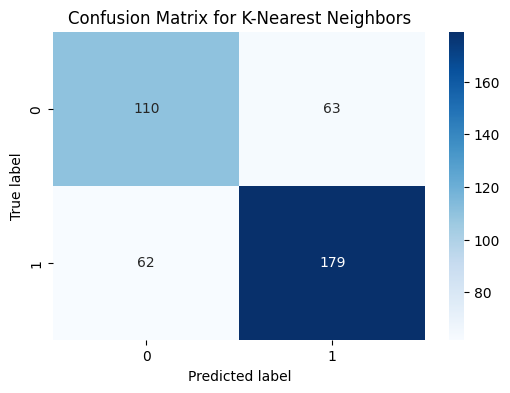



--- Naive Bayes ---
Accuracy: 0.8647
Precision: 0.8712
Recall: 0.8647
Confusion Matrix:
[[156  17]
 [ 39 202]]


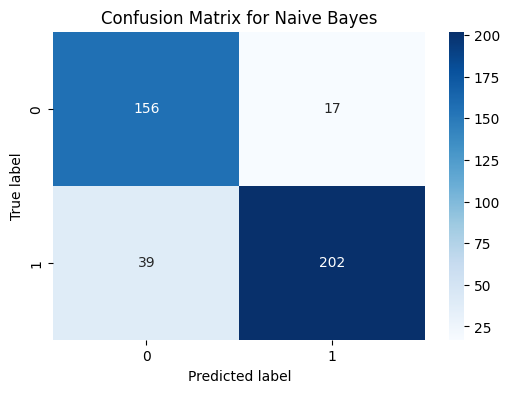



--- Decision Tree ---
Accuracy: 0.7923
Precision: 0.8034
Recall: 0.7923
Confusion Matrix:
[[145  28]
 [ 58 183]]


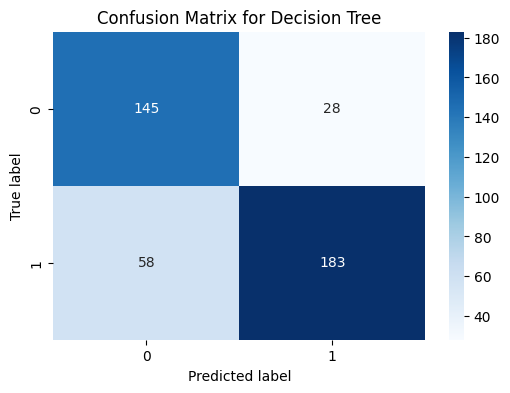



--- AdaBoost ---
Accuracy: 0.8430
Precision: 0.8522
Recall: 0.8430
Confusion Matrix:
[[154  19]
 [ 46 195]]


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


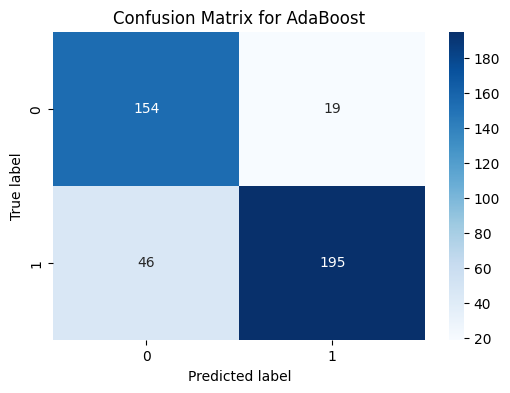



--- XGBoost ---
Accuracy: 0.8696
Precision: 0.8760
Recall: 0.8696
Confusion Matrix:
[[157  16]
 [ 38 203]]


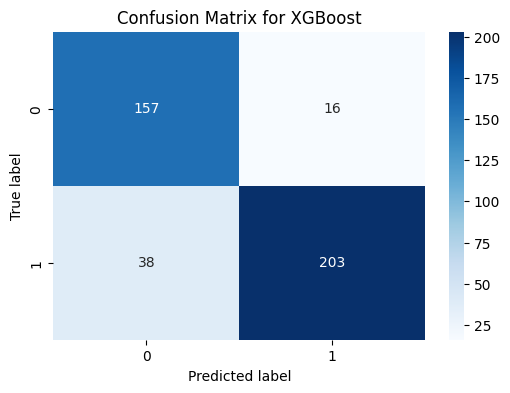

In [ ]:
# Dictionary to store predictions from each model
predictions_dict = {}

# Train and evaluate each model
for model_name, model in models.items():
    print(f"--- {model_name} ---")

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Store predictions in the dictionary
    predictions_dict[model_name] = y_pred

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Print results
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print("Confusion Matrix:")
    print(conf_matrix)

    # Plot confusion matrix
    plt.figure(figsize=(6,4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix for {model_name}")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

    print("\n")

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data
X_test_scaled = scaler.transform(X_test)

# Train the AdaBoost classifier on scaled data
adaboost_classifier_scaled = AdaBoostClassifier(base_classifier, n_estimators=50, random_state=42)
adaboost_classifier_scaled.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred_scaled = adaboost_classifier_scaled.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)
print(f'Accuracy with Scaling: {accuracy_scaled:.2f}')


Accuracy with Scaling: 0.89


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [ ]:
# Install necessary libraries
!pip install ipywidgets
!pip install matplotlib

import numpy as np
import pandas as pd
import pickle
import ipywidgets as widgets
from IPython.display import display, HTML

# Load the model
with open('heart_failure_model.pkl', 'rb') as file:
    model = pickle.load(file)

# Create input widgets and define them globally
age = widgets.FloatText(description='Age:')
sex = widgets.Dropdown(description='Sex:', options=[('Male', 1), ('Female', 0)])
chest_pain_type = widgets.IntSlider(description='Chest Pain Type:', min=0, max=3)
resting_bp = widgets.FloatText(description='Resting BP:')
cholesterol = widgets.FloatText(description='Cholesterol:')
fasting_bs = widgets.IntSlider(description='Fasting BS:', min=0, max=1)
resting_ecg = widgets.IntSlider(description='Resting ECG:', min=0, max=2)
max_hr = widgets.FloatText(description='Max HR:')
exercise_angina = widgets.IntSlider(description='Exercise Angina:', min=0, max=1)
oldpeak = widgets.FloatText(description='Oldpeak:')
st_slope = widgets.IntSlider(description='ST Slope:', min=0, max=2)

# Create prediction function
def predict_heart_disease(*args):
    input_data = np.array([[age.value, sex.value, chest_pain_type.value, resting_bp.value,
                             cholesterol.value, fasting_bs.value, resting_ecg.value,
                             max_hr.value, exercise_angina.value, oldpeak.value, st_slope.value]])
    prediction = model.predict(input_data)
    result = "Heart Disease Detected" if prediction[0] == 1 else "No Heart Disease"
    output.clear_output()
    with output:
        print(result)

# Display widgets
button = widgets.Button(description="Predict Heart Disease")
output = widgets.Output()

button.on_click(predict_heart_disease)

display(HTML("<h1>Heart Failure Prediction</h1>"))
display(age, sex, chest_pain_type, resting_bp, cholesterol, fasting_bs, resting_ecg, max_hr, exercise_angina, oldpeak, st_slope)
display(button, output)


FloatText(value=0.0, description='Age:')

Dropdown(description='Sex:', options=(('Male', 1), ('Female', 0)), value=1)

IntSlider(value=0, description='Chest Pain Type:', max=3)

FloatText(value=0.0, description='Resting BP:')

FloatText(value=0.0, description='Cholesterol:')

IntSlider(value=0, description='Fasting BS:', max=1)

IntSlider(value=0, description='Resting ECG:', max=2)

FloatText(value=0.0, description='Max HR:')

IntSlider(value=0, description='Exercise Angina:', max=1)

FloatText(value=0.0, description='Oldpeak:')

IntSlider(value=0, description='ST Slope:', max=2)

Button(description='Predict Heart Disease', style=ButtonStyle())

Output()

In [ ]:
# Install necessary libraries
!pip install ipywidgets
!pip install matplotlib

import numpy as np
import pandas as pd
import pickle
import ipywidgets as widgets
from IPython.display import display, HTML

# Load the model
with open('heart_failure_model.pkl', 'rb') as file:
    model = pickle.load(file)

# Create input widgets and define them globally with descriptions
age = widgets.FloatText(description='Age:', tooltip='Enter your age in years.')
sex = widgets.Dropdown(description='Sex:', options=[('Male', 1), ('Female', 0)],
                       tooltip='Select your sex: Male (1) or Female (0).')
chest_pain_type = widgets.IntSlider(description='Chest Pain Type:', min=0, max=3,
                                     tooltip='0: Typical Angina, 1: Atypical Angina, 2: Non-Anginal Pain, 3: Asymptomatic')
resting_bp = widgets.FloatText(description='Resting BP:', tooltip='Enter resting blood pressure (in mm Hg).')
cholesterol = widgets.FloatText(description='Cholesterol:', tooltip='Enter cholesterol level (in mg/dl). Normal: <200 mg/dl.')
fasting_bs = widgets.IntSlider(description='Fasting BS:', min=0, max=1,
                                tooltip='Fasting Blood Sugar: 0 if < 120 mg/dl, 1 if >= 120 mg/dl.')
resting_ecg = widgets.IntSlider(description='Resting ECG:', min=0, max=2,
                                 tooltip='Resting Electrocardiographic Results: 0: Normal, 1: Abnormal, 2: Hypertrophy')
max_hr = widgets.FloatText(description='Max HR:', tooltip='Enter maximum heart rate achieved.')
exercise_angina = widgets.IntSlider(description='Exercise Angina:', min=0, max=1,
                                     tooltip='Exercise Induced Angina: 0 = No, 1 = Yes.')
oldpeak = widgets.FloatText(description='Oldpeak:', tooltip='Depression induced by exercise relative to rest.')
st_slope = widgets.IntSlider(description='ST Slope:', min=0, max=2,
                              tooltip='Slope of the peak exercise ST segment: 0: Upsloping, 1: Flat, 2: Downsloping')

# Create prediction function
def predict_heart_disease(*args):
    input_data = np.array([[age.value, sex.value, chest_pain_type.value, resting_bp.value,
                             cholesterol.value, fasting_bs.value, resting_ecg.value,
                             max_hr.value, exercise_angina.value, oldpeak.value, st_slope.value]])
    prediction = model.predict(input_data)
    result = "Heart Disease Detected" if prediction[0] == 1 else "No Heart Disease"
    output.clear_output()
    with output:
        print(result)

# Display widgets
button = widgets.Button(description="Predict Heart Disease")
output = widgets.Output()

button.on_click(predict_heart_disease)

display(HTML("<h1>Heart Failure Prediction</h1>"))
display(age, sex, chest_pain_type, resting_bp, cholesterol, fasting_bs, resting_ecg, max_hr, exercise_angina, oldpeak, st_slope)
display(button, output)


FloatText(value=0.0, description='Age:')

Dropdown(description='Sex:', options=(('Male', 1), ('Female', 0)), value=1)

IntSlider(value=0, description='Chest Pain Type:', max=3)

FloatText(value=0.0, description='Resting BP:')

FloatText(value=0.0, description='Cholesterol:')

IntSlider(value=0, description='Fasting BS:', max=1)

IntSlider(value=0, description='Resting ECG:', max=2)

FloatText(value=0.0, description='Max HR:')

IntSlider(value=0, description='Exercise Angina:', max=1)

FloatText(value=0.0, description='Oldpeak:')

IntSlider(value=0, description='ST Slope:', max=2)

Button(description='Predict Heart Disease', style=ButtonStyle())

Output()